In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import plotly.express as px

#----------------mount the google drive
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path= '/content/drive/MyDrive/Redi/Project-1/sales'

In [ ]:
##This code below is appplied when a file contain several csv

In [ ]:
# Get a list of all files in the directory
file_list = os.listdir(path)

# Read multiple files
sales = []
for file_name in file_list:
    # Check if the file is a CSV file (you can modify this condition based on your file format)
    if file_name.endswith('.csv'):
        file_path = os.path.join(path, file_name)
        df = pd.read_csv(file_path)
        sales.append(df)

In [ ]:
# Merging the sales of different months together
df= pd.concat(sales)
# Get the number of rows and columns present in dataset
print(df.shape)
df.head()

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# Check the datatypes and info
print(df.dtypes)
df.info()

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Data Conversion and Feature Engineering

In [ ]:
# Convert datatypes
 #----'Quantity Ordered', 'Price Each', 'Order Date'
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Date'].head()

0   2019-04-19 08:46:00
1                   NaT
2   2019-04-07 22:30:00
3   2019-04-12 14:38:00
4   2019-04-12 14:38:00
Name: Order Date, dtype: datetime64[ns]

In [ ]:
# Convert quantity order from object to integer
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float).astype(pd.Int64Dtype())
df['Quantity Ordered'].dtype

Int64Dtype()

In [ ]:
# Convert quantity order from object to integer
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Price Each'] = df['Price Each'].astype(float)
df['Price Each'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 17660
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  Int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), object(3)
memory usage: 10.2+ MB


In [ ]:
# Get the total number of missing values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
dtype: int64

In [ ]:
# Display the missing values
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,<NA>,NaN,NaT,NaN
356,NaN,NaN,<NA>,NaN,NaT,NaN
519,Order ID,Product,<NA>,NaN,NaT,Purchase Address
735,NaN,NaN,<NA>,NaN,NaT,NaN
1149,Order ID,Product,<NA>,NaN,NaT,Purchase Address
...,...,...,...,...,...,...
17147,Order ID,Product,<NA>,NaN,NaT,Purchase Address
17227,NaN,NaN,<NA>,NaN,NaT,NaN
17259,Order ID,Product,<NA>,NaN,NaT,Purchase Address
17464,NaN,NaN,<NA>,NaN,NaT,NaN


In [ ]:
# Drop missing values
df.dropna(inplace=True)

In [ ]:
# Check the missing values again
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
# Extract city from 'Purchase Address'
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
# Create separate columns for month, day, year
df['Date'] = df['Order Date'].dt.strftime("%Y-%m-%d")
df['Year'] = df['Order Date'].dt.strftime("%Y")
df['Month'] = df['Order Date'].dt.strftime('%B')
df['Day'] = df['Order Date'].dt.strftime("%d")
df['Day_Name'] = df['Order Date'].dt.strftime("%A")
df['Hour'] = df['Order Date'].dt.hour
df['AM/PM'] = df['Order Date'].dt.strftime("%p")
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Date,Year,Month,Day,Day_Name,Hour,AM/PM
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,2019-04-19,2019,April,19,Friday,8,AM
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,2019-04-07,2019,April,07,Sunday,22,PM


In [ ]:
# kPI
print(df['Price Each'].sum())
print(df['Quantity Ordered'].count())
print(df['Order ID'].nunique())
print(df['Product'].nunique())

34289130.67999999
185950
178437
19


In [ ]:
# Get the summary statistics
df.describe()

,Quantity Ordered,Price Each,Hour
count,185950.0,185950.000000,185950.000000
mean,1.124383,184.399735,14.413305
std,0.442793,332.731330,5.423416
min,1.0,2.990000,0.000000
25%,1.0,11.950000,11.000000
50%,1.0,14.950000,15.000000
75%,1.0,150.000000,19.000000
max,9.0,1700.000000,23.000000


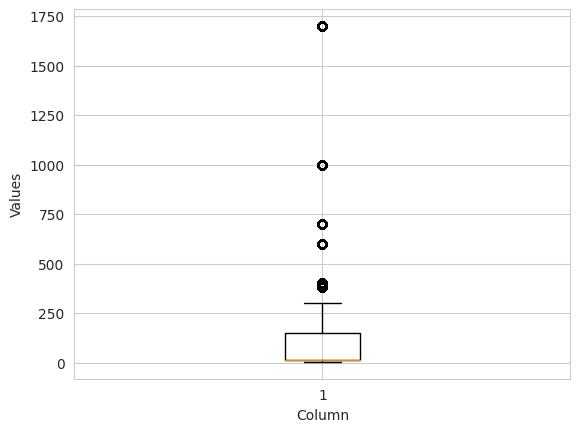

In [ ]:
# Check outliiers
plt.boxplot(df['Price Each'])
plt.xlabel('Column')
plt.ylabel('Values')
plt.show()

In [ ]:
# Calculate the IQR
q1 = df['Price Each'].quantile(0.25)
q3 = df['Price Each'].quantile(0.75)
iqr = q3 - q1

In [ ]:
# Set thresholds for outliers
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

In [ ]:
# Filter the top outliers
top_outliers = df[df['Price Each'] > upper_threshold].nlargest(15, 'Price Each')
top_outliers

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Date,Year,Month,Day,Day_Name,Hour,AM/PM
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",San Francisco,2019-04-24,2019,April,24,Wednesday,10,AM
86,176639,Macbook Pro Laptop,1,1700.0,2019-04-28 16:14:00,"853 Cedar St, San Francisco, CA 94016",San Francisco,2019-04-28,2019,April,28,Sunday,16,PM
90,176643,Macbook Pro Laptop,1,1700.0,2019-04-27 21:32:00,"373 Adams St, Boston, MA 02215",Boston,2019-04-27,2019,April,27,Saturday,21,PM
93,176646,Macbook Pro Laptop,1,1700.0,2019-04-22 07:14:00,"657 Adams St, Portland, OR 97035",Portland,2019-04-22,2019,April,22,Monday,7,AM
136,176687,Macbook Pro Laptop,1,1700.0,2019-04-30 10:26:00,"121 Wilson St, Los Angeles, CA 90001",Los Angeles,2019-04-30,2019,April,30,Tuesday,10,AM
198,176747,Macbook Pro Laptop,1,1700.0,2019-04-27 15:04:00,"645 7th St, San Francisco, CA 94016",San Francisco,2019-04-27,2019,April,27,Saturday,15,PM
262,176806,Macbook Pro Laptop,1,1700.0,2019-04-22 13:26:00,"197 Cherry St, Austin, TX 73301",Austin,2019-04-22,2019,April,22,Monday,13,PM
483,177020,Macbook Pro Laptop,1,1700.0,2019-04-16 22:31:00,"606 Walnut St, Seattle, WA 98101",Seattle,2019-04-16,2019,April,16,Tuesday,22,PM
531,177066,Macbook Pro Laptop,1,1700.0,2019-04-08 20:02:00,"278 10th St, San Francisco, CA 94016",San Francisco,2019-04-08,2019,April,08,Monday,20,PM
588,177120,Macbook Pro Laptop,1,1700.0,2019-04-03 09:46:00,"371 Church St, New York City, NY 10001",New York City,2019-04-03,2019,April,03,Wednesday,9,AM


## Exploratory Data Analysis

In [ ]:
#-----------------Task:
#Q: What was the best Year for sales? How much was earned that Year?
#Q: What was the best month for sales? How much was earned that month?
#Q: What City had the highest number of sales?
#Q: What time should we display adverstisement to maximize likelihood of customer's buying product?
#Q: What products are most often sold together?
#Q: What product sold the most? Why do you think it sold the most?

#How Much Probability?
#How much probability for next people will ordered USB-C Charging Cable?
#How much probability for next people will ordered iPhone?
#How much probability for next people will ordered Google Phone?
#How much probability other peoples will ordered Wired Headphones?

In [ ]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'City', 'Date', 'Year', 'Month', 'Day', 'Day_Name',
       'Hour', 'AM/PM'],
      dtype='object')

In [ ]:
# Get the number of years
df['Year'].unique()

array(['2019', '2020'], dtype=object)

In [ ]:
#Q: What was the best Year for sales? How much was earned that Year?
df.groupby('Year')['Price Each'].sum()

Year
2019    34280627.28
2020        8503.40
Name: Price Each, dtype: float64

In [ ]:
# Calculate the sum of 'Price Each' column grouped by 'Year'
grouped_data = df.groupby('Year')['Price Each'].sum().reset_index()

# Create a bar plot using Plotly
fig = px.bar(grouped_data, y='Year', x='Price Each', labels={'Price Each': 'Total Price'})
fig.update_layout(title='Total Price Each by Year')
# Add text annotations to display values
#fig.update_traces(textposition='outside')
# Display the values on the bars
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.show()

In [ ]:
# Get the data in year 2020
yr20= df.groupby(['Year', 'Month','Day'])['Price Each'].sum().reset_index()
yr20 = yr20[(yr20['Year'] == '2020')]
yr20

,Year,Month,Day,Price Each
365,2020,January,01,8503.4


In [ ]:
#Q: What was the best Month for sales? How much was earned that Month?
#--------best Month for sales and Count of the number of transactions by month
df1= df.groupby('Month').agg({'Order ID': 'count', 'Price Each': 'sum'}).reset_index()
df1 = pd.DataFrame(df1)

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df1['Month'] = pd.Categorical(df1['Month'], categories=month_order, ordered=True)
df1 = df1.sort_values('Month')
df1

,Month,Order ID,Price Each
4,January,9709,1811768.38
3,February,11975,2188884.72
7,March,15153,2791207.83
0,April,18279,3367671.02
8,May,16566,3135125.13
6,June,13554,2562025.61
5,July,14293,2632539.56
1,August,11961,2230345.42
11,September,11621,2084992.09
10,October,20282,3715554.83


In [ ]:
df1['Price Each'].sum()

34289130.68000001

In [ ]:
#tran= df.groupby(['Date'])['Order ID'].count().reset_index()
# Enlarge the size of the chart
#plt.figure(figsize=(50, 6))

# Plot the number of transactions over time
#plt.plot(tran['Date'], tran['Order ID'])
#plt.xlabel('Date')
#plt.ylabel('Number of Transactions')
#plt.title('Number of Transactions over Time')
#plt.xticks(rotation=45)
#plt.show()

In [ ]:
# Create a line chart for Total Price Each by Month
fig = px.line(df1, x='Month', y='Price Each', labels={'Price Each': 'Total Price'})
fig.update_layout(title='Total Price Each by Month', font=dict(size=12, color='black'))

fig.update_traces(textfont=dict(size=26, color='black', family='Arial, sans-serif'), selector=dict(type='scatter'))

# Display the plot
fig.show()

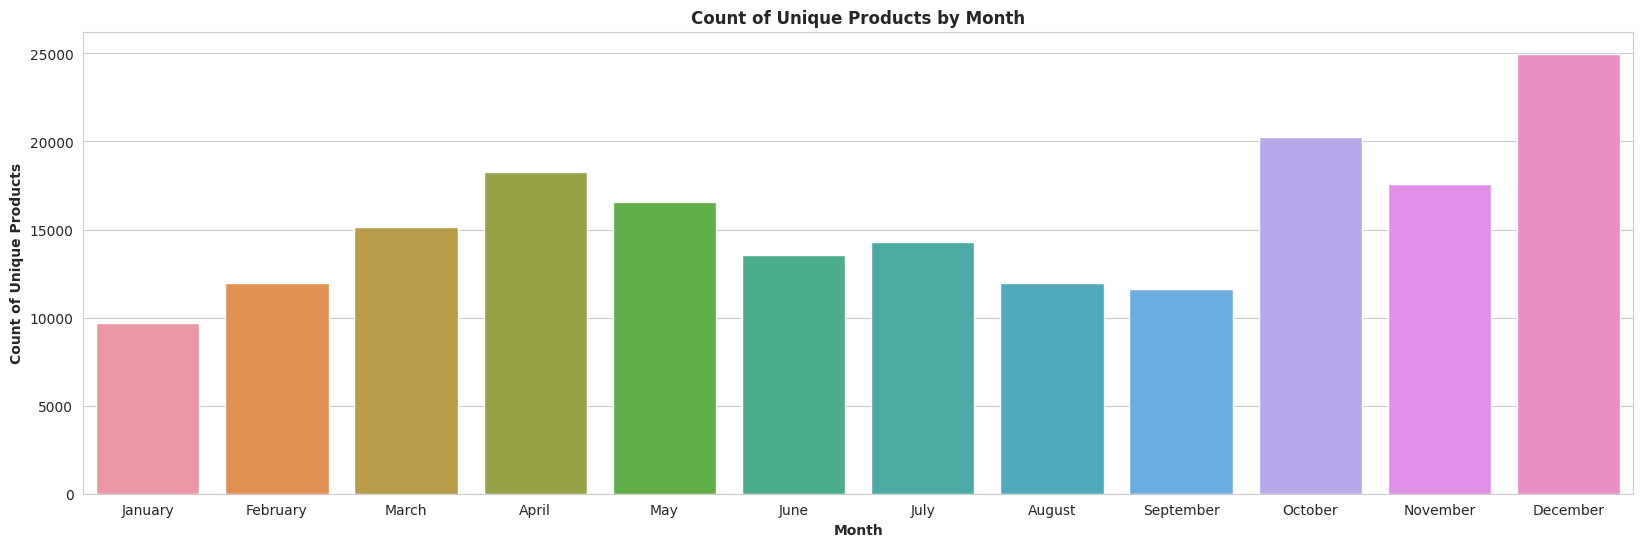

In [ ]:
# Set Seaborn style and background
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Create the bar plot
plt.figure(figsize=(20, 6))
sns.barplot(data=df1, x='Month', y='Order ID')

# Set labels and title
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Count of Unique Products', fontweight='bold')
plt.title('Count of Unique Products by Month', fontweight='bold')

# Display the plot
plt.show()

In [ ]:
# Filter to December and individual days
day= df.groupby(['Month', 'Day'])['Price Each'].sum().reset_index()
# Filter data for December
december_data = day[(day['Month'] == 'December')]
december_data

,Month,Day,Price Each
61,December,01,147496.75
62,December,02,148318.37
63,December,03,142006.18
64,December,04,165977.89
65,December,05,153811.15
66,December,06,151185.28
67,December,07,139109.31
68,December,08,142497.00
69,December,09,146717.44
70,December,10,162234.28


In [ ]:
# Create a bar chart using Plotly
fig = px.line(december_data, x='Day', y='Price Each', labels={'Price Each': 'Sales'}, title='December Sales')
fig.update_layout(xaxis_title='Day', yaxis_title='Sales')

In [ ]:
df['City'].unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [ ]:
#Q: What City had the highest number of sales?
# Group by city and calculate the total sales
city_sales = df.groupby('City')['Quantity Ordered','Price Each'].sum().reset_index()
city_sales = city_sales.sort_values('Price Each', ascending=False)
city_sales

<ipython-input-81-fb5936fe5e57>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,City,Quantity Ordered,Price Each
7,San Francisco,50239,8211461.74
4,Los Angeles,33289,5421435.23
5,New York City,27932,4635370.83
2,Boston,22528,3637409.77
0,Atlanta,16602,2779908.20
3,Dallas,16730,2752627.82
8,Seattle,16553,2733296.01
6,Portland,14053,2307747.47
1,Austin,11153,1809873.61


In [ ]:
# Create a bar plot for Total Sales by City
fig = px.bar(city_sales, y='City', x='Price Each', color='Price Each',
             labels={'Price Each': 'Total Sales'}, title='Total Sales by City')

fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.show()

In [ ]:
#Q: What time should we display adverstisement to maximize likelihood of customer's buying product?
# Group by hour and calculate the order frequency by counting the number of order id and get total sales by suming the price
hourly_ad = df.groupby('Hour').agg({'Order ID': 'count', 'Price Each': 'sum'}).sort_values('Price Each', ascending=False)
hourly_ad

,Order ID,Price Each
Hour,,
19,12905,2398588.31
12,12587,2299876.68
11,12411,2288855.18
20,12228,2268185.16
18,12280,2207696.93
13,12129,2139743.86
17,10899,2116777.02
14,10984,2072194.77
21,10921,2030763.83


In [ ]:
hourly_ad = df.groupby('Hour').agg({'Order ID': 'count', 'Price Each': 'sum'}).reset_index()
hourly_ad.columns = ['Hour', 'Order Frequency', 'Sales']
hourly_ad

,Hour,Order Frequency,Sales
0,0,3910,709296.70
1,1,2350,458490.00
2,2,1243,233833.64
3,3,831,144726.42
4,4,854,162058.18
5,5,1321,229621.21
6,6,2482,445000.11
7,7,4011,740568.11
8,8,6256,1185970.62
9,9,8748,1628498.49


In [ ]:
# Get the number of products and sales made by hour
hourly_counts = df.groupby('Hour').agg({'Product': 'count', 'Price Each': 'sum'}).reset_index()

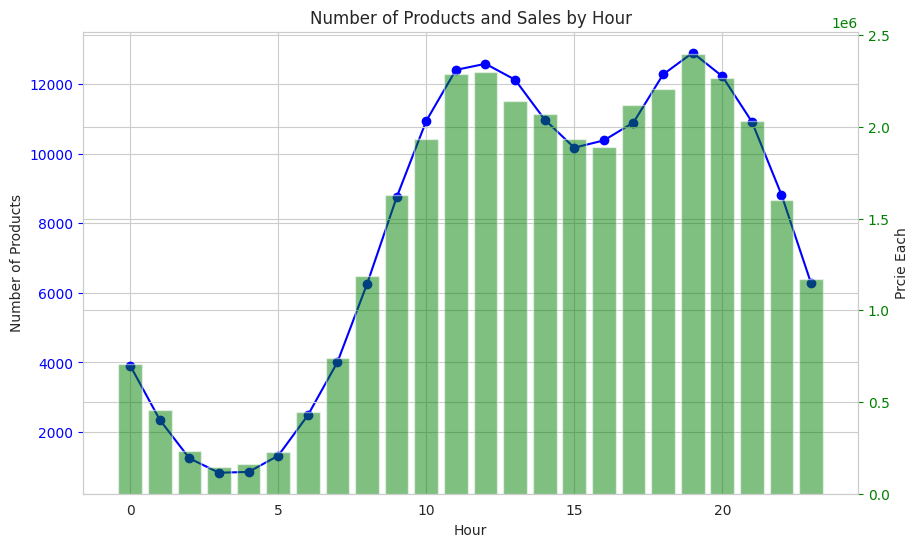

In [ ]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plot for number of products
ax1.plot(hourly_counts['Hour'], hourly_counts['Product'], color='blue', marker='o')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Products')
ax1.tick_params(axis='y', colors='blue')

# Bar plot for sales
ax2 = ax1.twinx()
ax2.bar(hourly_counts['Hour'], hourly_counts['Price Each'], color='green', alpha=0.5)
ax2.set_ylabel('Prcie Each')
ax2.tick_params(axis='y', colors='green')

plt.title('Number of Products and Sales by Hour')
plt.show()

In [ ]:
#----Number Product count above sales- 10 & 18
#----sales above Number Product count- 8 & 17

In [ ]:
# Filter the product purchased in 10:00 hour
filtered_products10 = df[df['Hour'] == 10]
product_counts10 = filtered_products10.groupby(['Product', 'Price Each']).size().reset_index(name='Count')
product_counts10['Total Price'] = product_counts10['Price Each'] * product_counts10['Count']
product_counts10=product_counts10.sort_values('Total Price', ascending= False)
product_counts10

,Product,Price Each,Count,Total Price
13,Macbook Pro Laptop,1700.00,246,418200.00
18,iPhone,700.00,405,283500.00
14,ThinkPad Laptop,999.99,236,235997.64
9,Google Phone,600.00,320,192000.00
1,27in 4K Gaming Monitor,389.99,368,143516.32
6,Apple Airpods Headphones,150.00,929,139350.00
3,34in Ultrawide Monitor,379.99,354,134516.46
7,Bose SoundSport Headphones,99.99,818,81791.82
8,Flatscreen TV,300.00,269,80700.00
2,27in FHD Monitor,149.99,421,63145.79


In [ ]:
product10 = product_counts10.head(3)
product10 = (product10['Total Price'] / product_counts10['Total Price'].sum()) * 100
product10

13    21.638508
18    14.668859
14    12.210992
Name: Total Price, dtype: float64

In [ ]:
# Filter the product purchased in 18:00 hour
filtered_products18 = df[df['Hour'] == 18]
product_counts18 = filtered_products18.groupby(['Product', 'Price Each']).size().reset_index(name='Count')
product_counts18['Total Price'] = product_counts18['Price Each'] * product_counts18['Count']
product_counts18=product_counts18.sort_values('Total Price', ascending= False)
product_counts18

,Product,Price Each,Count,Total Price
13,Macbook Pro Laptop,1700.00,290,493000.00
18,iPhone,700.00,459,321300.00
14,ThinkPad Laptop,999.99,237,236997.63
9,Google Phone,600.00,392,235200.00
3,34in Ultrawide Monitor,379.99,420,159595.80
1,27in 4K Gaming Monitor,389.99,405,157945.95
6,Apple Airpods Headphones,150.00,990,148500.00
8,Flatscreen TV,300.00,308,92400.00
7,Bose SoundSport Headphones,99.99,901,90090.99
2,27in FHD Monitor,149.99,491,73645.09


In [ ]:
product18 = product_counts18.head(3)
product18 = (product18['Total Price'] / product_counts18['Total Price'].sum()) * 100
product18

13    22.330964
18    14.553628
14    10.735062
Name: Total Price, dtype: float64

In [ ]:
# Filter the product purchased in 08:00 hour
filtered_products8 = df[df['Hour'] == 8]
product_counts8 = filtered_products8.groupby(['Product', 'Price Each']).size().reset_index(name='Count')
product_counts8['Total Price'] = product_counts8['Price Each'] * product_counts8['Count']
product_counts8=product_counts8.sort_values('Total Price', ascending= False)
product_counts8

,Product,Price Each,Count,Total Price
13,Macbook Pro Laptop,1700.00,165,280500.00
18,iPhone,700.00,223,156100.00
14,ThinkPad Laptop,999.99,155,154998.45
9,Google Phone,600.00,201,120600.00
3,34in Ultrawide Monitor,379.99,211,80177.89
6,Apple Airpods Headphones,150.00,525,78750.00
1,27in 4K Gaming Monitor,389.99,199,77608.01
8,Flatscreen TV,300.00,172,51600.00
7,Bose SoundSport Headphones,99.99,443,44295.57
2,27in FHD Monitor,149.99,236,35397.64


In [ ]:
product8 = product_counts8.head(3)
product8 = (product8['Total Price'] / product_counts8['Total Price'].sum()) * 100
product8

13    23.651513
18    13.162215
14    13.069333
Name: Total Price, dtype: float64

In [ ]:
# Filter the product purchased in 17:00 hour
filtered_products = df[df['Hour'] == 17]
unique_products = filtered_products[['Product', 'Price Each']].drop_duplicates().sort_values('Price Each', ascending=False)
unique_products

,Product,Price Each
693,Macbook Pro Laptop,1700.00
1824,ThinkPad Laptop,999.99
1003,iPhone,700.00
11,Google Phone,600.00
4728,LG Dryer,600.00
10597,LG Washing Machine,600.00
1179,Vareebadd Phone,400.00
1646,27in 4K Gaming Monitor,389.99
189,34in Ultrawide Monitor,379.99
352,Flatscreen TV,300.00


In [ ]:
filtered_products = df[df['Hour'] == 17]
product_counts17 = filtered_products.groupby(['Product', 'Price Each']).size().reset_index(name='Count')
product_counts17['Total Price'] = product_counts17['Price Each'] * product_counts17['Count']
product_counts17=product_counts17.sort_values('Total Price', ascending= False)
product_counts17

,Product,Price Each,Count,Total Price
13,Macbook Pro Laptop,1700.00,322,547400.00
18,iPhone,700.00,402,281400.00
14,ThinkPad Laptop,999.99,276,275997.24
9,Google Phone,600.00,313,187800.00
1,27in 4K Gaming Monitor,389.99,401,156385.99
3,34in Ultrawide Monitor,379.99,359,136416.41
6,Apple Airpods Headphones,150.00,859,128850.00
8,Flatscreen TV,300.00,295,88500.00
7,Bose SoundSport Headphones,99.99,812,81191.88
2,27in FHD Monitor,149.99,436,65395.64


In [ ]:
product17 = product_counts17.head(3)
product17 = (product17['Total Price'] / product_counts17['Total Price'].sum()) * 100
product17

13    25.860069
18    13.293795
14    13.038560
Name: Total Price, dtype: float64

In [ ]:
from scipy import stats

# List of pairs of days to compare
#day_pairs = [('Tuesday', 'Sunday'), ('Monday', 'Saturday'), ('Wednesday', 'Thursday')]
hourly_pairs = [(8, 18), (10, 17)]

# Perform independent t-test for each pair of hours
for hour1, hour2 in hourly_pairs:
    sample1 = df.loc[df['Hour'] == hour1, 'Price Each']
    sample2 = df.loc[df['Hour'] == hour2, 'Price Each']

    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    print(f"T-Statistic for {hour1} vs {hour2}: {t_statistic}")
    print(f"P-Value for {hour1} vs {hour2}: {p_value}")
    print()

T-Statistic for 8 vs 18: 1.913705433121229
P-Value for 8 vs 18: 0.05567319091145088

T-Statistic for 10 vs 17: -3.8805712755435535
P-Value for 10 vs 17: 0.00010451736655190161



In [ ]:
# Group by hour and calculate the order frequency by counting the number of order id and get total sales by suming the price
day = df.groupby('Day_Name').agg({'Order ID': 'count', 'Price Each': 'sum'}).sort_values('Order ID', ascending=False)
day

,Order ID,Price Each
Day_Name,,
Tuesday,27175,5061153.03
Sunday,26551,4903226.77
Monday,26547,4850763.70
Saturday,26492,4873105.48
Wednesday,26477,4960045.85
Thursday,26461,4810040.26
Friday,26247,4830795.59


In [ ]:
# Perform an independent t-test between day and price
# Perform a t-test to see if the difference is significant.
        # Perform t-tests for each pair of groups

from scipy import stats

# List of pairs of days to compare
#day_pairs = [('Tuesday', 'Sunday'), ('Monday', 'Saturday'), ('Wednesday', 'Thursday')]
day_pairs = [('Monday', 'Sunday'), ('Monday', 'Saturday'), ('Wednesday', 'Saturday')]

# Perform independent t-test for each pair of days
for day1, day2 in day_pairs:
    sample1 = df.loc[df['Day_Name'] == day1, 'Price Each']
    sample2 = df.loc[df['Day_Name'] == day2, 'Price Each']

    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    print(f"T-Statistic for {day1} vs {day2}: {t_statistic}")
    print(f"P-Value for {day1} vs {day2}: {p_value}")
    print()

T-Statistic for Monday vs Sunday: -0.6729921608117986
P-Value for Monday vs Sunday: 0.5009552071498624

T-Statistic for Monday vs Saturday: -0.4232491636248911
P-Value for Monday vs Saturday: 0.6721151964911826

T-Statistic for Wednesday vs Saturday: 1.1726525727155193
P-Value for Wednesday vs Saturday: 0.24094043152460456



T-Statistic for Monday vs Sunday: -0.6729921608117986

P-Value for Monday vs Sunday: 0.5009552071498624
    
    In this case, the t-statistic is negative, indicating that the mean price on Monday is lower than the mean price on Sunday.However, the absolute value of the t-statistic is relatively small, suggesting that the difference is not significant.

    A p-value greater than the significance level (usually 0.05) suggests that there is no significant difference between the two samples. In this case, the p-value is 0.5009552071498624, which is greater than 0.05. Therefore, there is not enough evidence to reject the null hypothesis, indicating that there is no significant difference in prices between Monday and Sunday.

T-Statistic for Monday vs Saturday: -0.4232491636248911

P-Value for Monday vs Saturday: 0.6721151964911826

    same as above

T-Statistic for Wednesday vs Saturday: 1.1726525727155193

P-Value for Wednesday vs Saturday: 0.24094043152460456

    In this comparison, the t-statistic is positive, indicating that the mean price on Wednesday is higher than the mean price on Saturday. The t-statistic is relatively large compared to the previous comparisons, suggesting a larger difference. However, the p-value is 0.24094043152460456, which is still greater than 0.05. Therefore, there is no sufficient evidence to reject the null hypothesis, indicating that there is no significant difference in prices between Wednesday and Saturday.

Based on the t-statistics and p-values from the analysis, it appears that there are no significant differences in prices between the days being compared. Therefore, the price alone does not seem to be a determining factor for selecting the best day to display advertisements.

### Product

In [ ]:
#Q: What product sold the most? Why do you think it sold the most?
# -------Perform the groupby operation on product and count of product quantity sold
df_y= df.groupby('Product').agg({'Order ID': 'count', 'Price Each': 'sum'}).reset_index()
df_y= df_y.sort_values('Price Each', ascending= False)
df_y

,Product,Order ID,Price Each
13,Macbook Pro Laptop,4724,8030800.00
18,iPhone,6842,4789400.00
14,ThinkPad Laptop,4128,4127958.72
9,Google Phone,5525,3315000.00
1,27in 4K Gaming Monitor,6230,2429637.70
3,34in Ultrawide Monitor,6181,2348718.19
6,Apple Airpods Headphones,15549,2332350.00
8,Flatscreen TV,4800,1440000.00
7,Bose SoundSport Headphones,13325,1332366.75
2,27in FHD Monitor,7507,1125974.93


In [ ]:
# Create the funnel chart
fig = px.funnel(df_y, x='Price Each', y='Product')

# Update the layout
fig.update_layout(
    title="Funnel Chart - Product Sales",
    xaxis_title="Total Sales",
    yaxis_title="Product"
)

# Show the chart
fig.show()

In [ ]:
#Q: What products are most often sold together?
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [ ]:
from itertools import combinations
from collections import Counter

# Create a list of lists containing the products for each order
order_products = df.groupby('Order ID')['Product'].apply(list).reset_index(name='Products')

# Create a list of combinations of products for each order (combinations of 2 and 3)
product_combinations = []
for products in order_products['Products']:
    product_combinations.extend(list(combinations(products, 2)))
    product_combinations.extend(list(combinations(products, 3)))

# Count the occurrence of each product combination
product_counts = Counter(product_combinations)

# Create a DataFrame from the product counts
result_df = pd.DataFrame.from_records(list(product_counts.items()), columns=['Combination', 'Count'])

# Add a new column for the length of the combination
result_df['Combination Length'] = result_df['Combination'].apply(lambda x: len(x))

# Filter out rows with count less than 100
filtered_df = result_df[result_df['Count'] >= 80]

# Sort the DataFrame by count in descending order
sorted_df = filtered_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Print the most frequently sold product combinations
sorted_df


,Combination,Count,Combination Length
0,"(iPhone, Lightning Charging Cable)",1005,2
1,"(Google Phone, USB-C Charging Cable)",987,2
2,"(iPhone, Wired Headphones)",447,2
3,"(Google Phone, Wired Headphones)",414,2
4,"(Vareebadd Phone, USB-C Charging Cable)",361,2
5,"(iPhone, Apple Airpods Headphones)",360,2
6,"(Google Phone, Bose SoundSport Headphones)",220,2
7,"(USB-C Charging Cable, Wired Headphones)",160,2
8,"(Vareebadd Phone, Wired Headphones)",143,2
9,"(Lightning Charging Cable, Wired Headphones)",92,2


In [ ]:
# Create a treemap
#plt.figure(figsize=(20, 10))
fig = px.treemap(filtered_df, path=['Combination'], values='Count', title='Most Frequently Sold Product Combinations')
fig.show()

In [15]:
!apt-get install -y git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [16]:
!git config --global user.name "Ernestug"
!git config --global user.email "ernestugwoke@gmail.com"


In [17]:
!git clone https://github.com/Ernestug/Sales_Product


Cloning into 'Sales_Product'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [12]:
%cd Sales_Product


/content/Sales_Product/Sales_Product


In [18]:
!git add .


hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> Sales_Product
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached Sales_Product
hint: 
hint: See "git help submodule" for more information.


In [14]:
!git commit -m "first commit on the Sales"


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
